In [1]:
#Import the libraries for project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##**Data Set Information**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In [2]:
#load dataset
data=pd.read_csv('bank-full.csv')

##**Understand the Data**

An introductory step is to look at the content of the data to get an idea of what we are going to be dealing with 

In [28]:
#view the shape of the data to identify the number of rows and columns in the dataframe
data.shape

(45211, 17)

In [29]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [30]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [31]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [33]:
data.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [34]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Cleaning and Manipulation

In [3]:
#replace 'y' to 'deposit
data.rename(columns = {'y' : 'deposit'}, inplace = True)


In [4]:
#check for missing data
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

**Take away**

*   No missing value found



In [37]:
#Find features with unique value
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
deposit         2
dtype: int64

**Take away**

*   No feature with unique value




## **Developing questions and extracting Insights**

# **1. How many categorical features does the dataset have and which are the highest?**

In [11]:
categorical_features= [feature for feature in data.columns if ((data[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [39]:
for feature in categorical_features:
  print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


**Take away**


*   There are 10 categorical features
*   Job and Month has the highest categorical values




## What are the categorical Feature distribution?

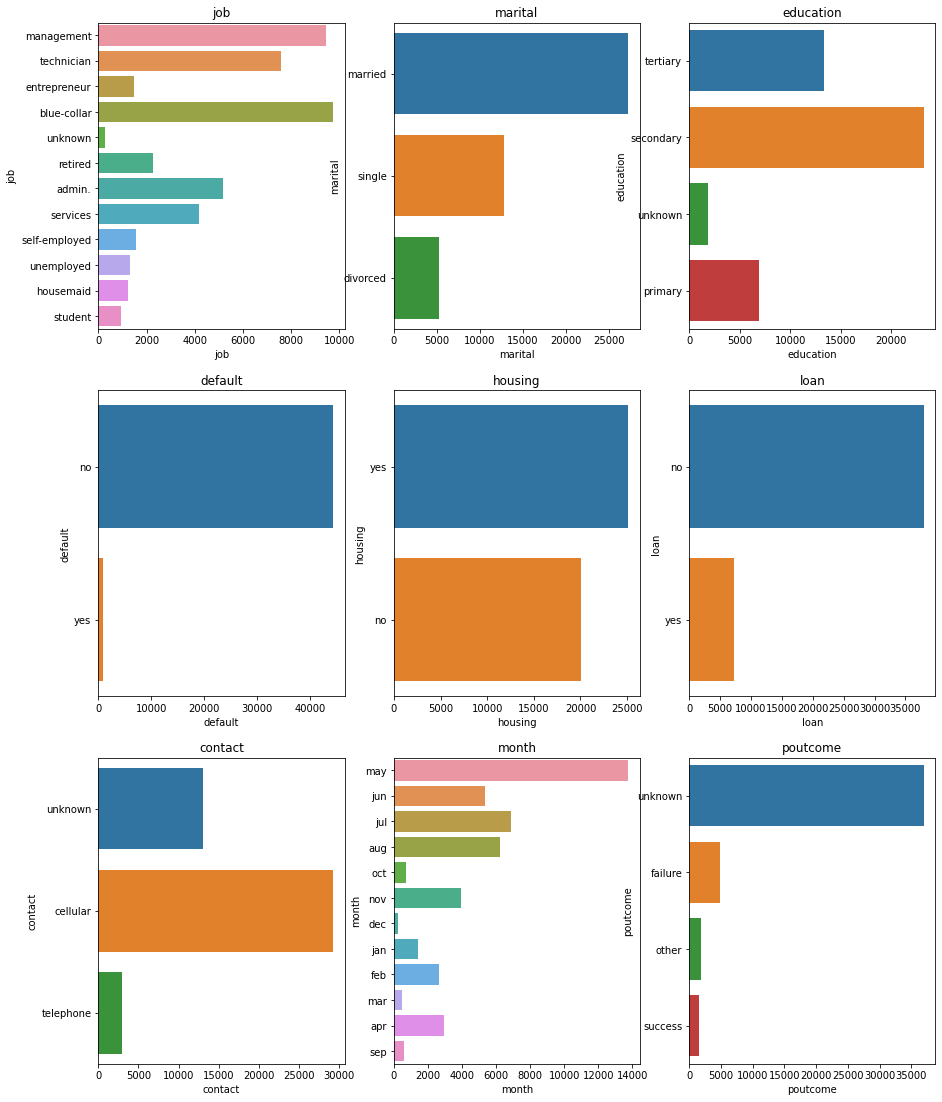

In [40]:
#check count based on categorical feature
plt.figure(figsize=(15,80), facecolor = 'white')
plotnumber = 1
for categorical_feature in categorical_features:
  ax = plt.subplot(12,3,plotnumber)
  sns.countplot(y=categorical_feature,data=data)
  plt.xlabel(categorical_feature)
  plt.title(categorical_feature)
  plotnumber+=1
plt.show()

**Take away**

*   Client with job type as management and blue collar records are high in the given dataset where as jobs like housemaid and student are very less 
*   Client who married are high in records while divorced are less
*  Client whose educational background is secondary are highest
*  Data in month of may is highest while least in Dec


## What are the relationship between Categorical features and label

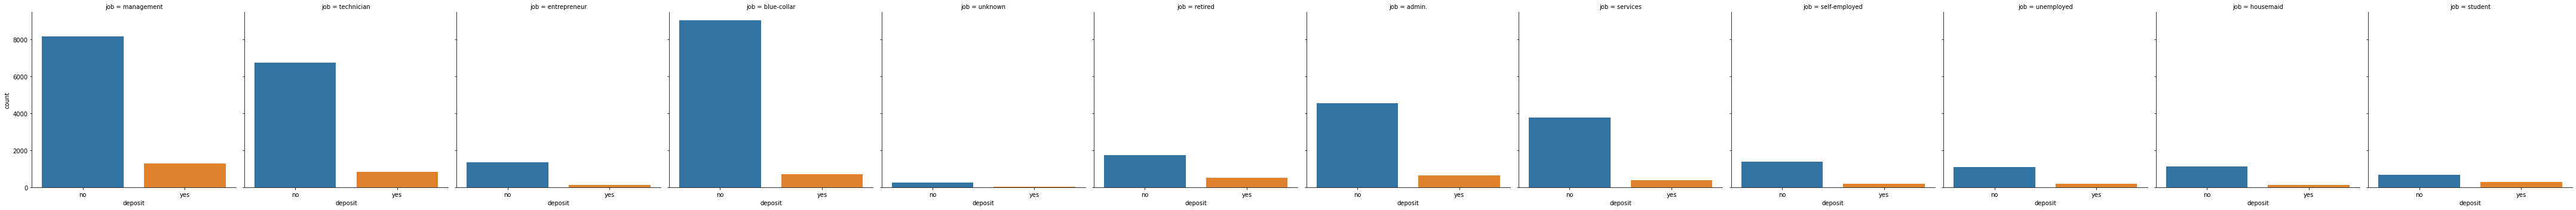

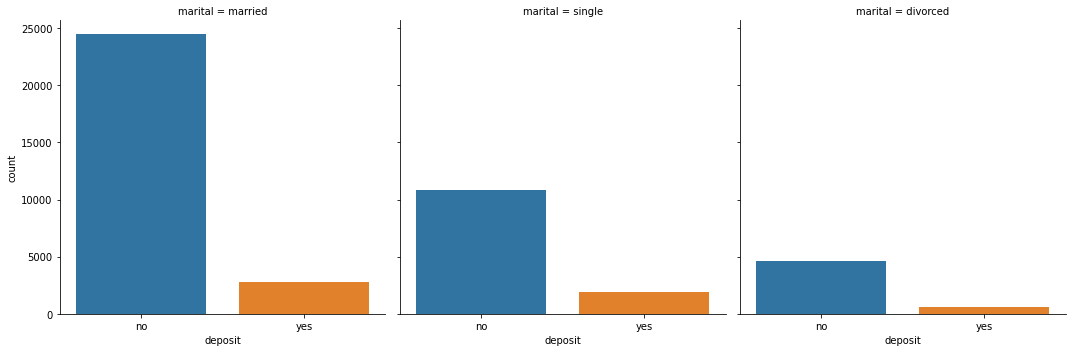

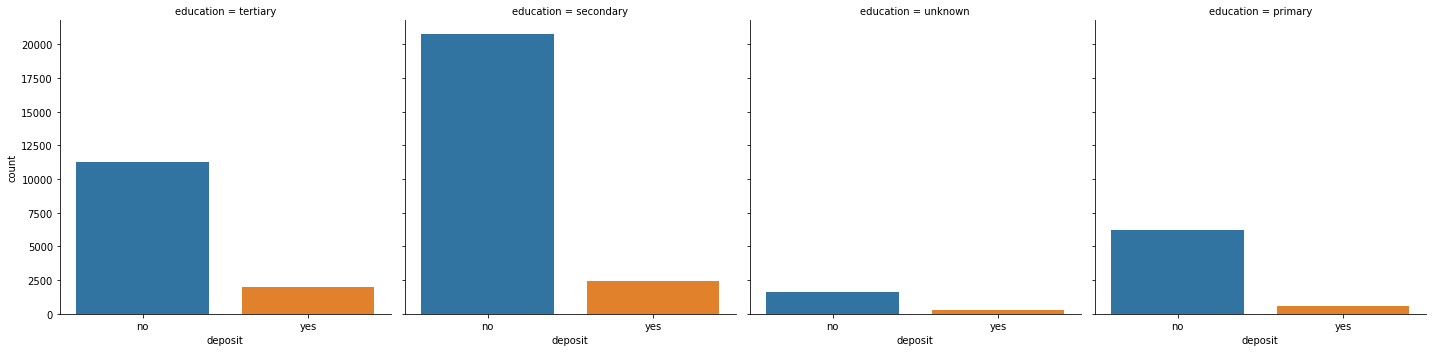

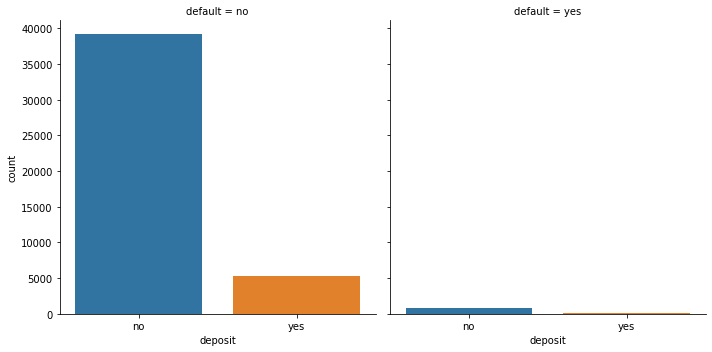

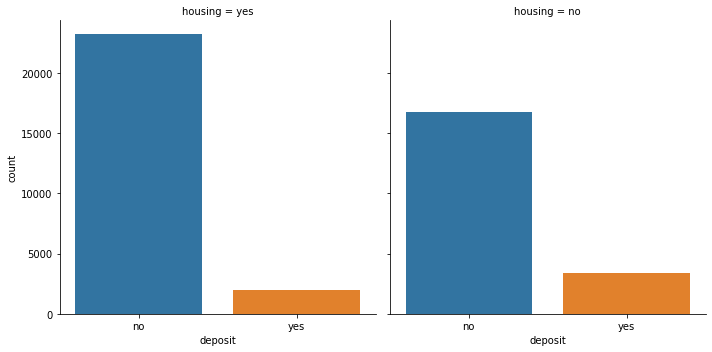

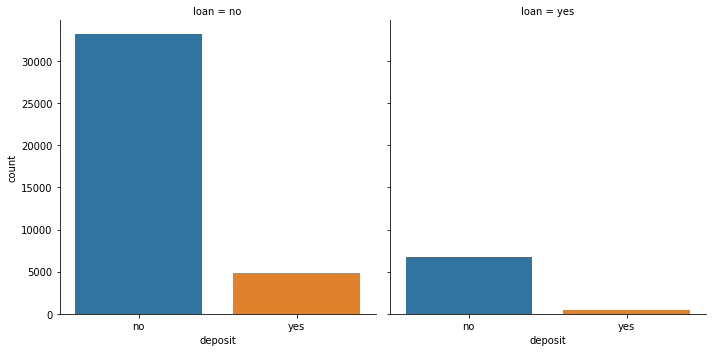

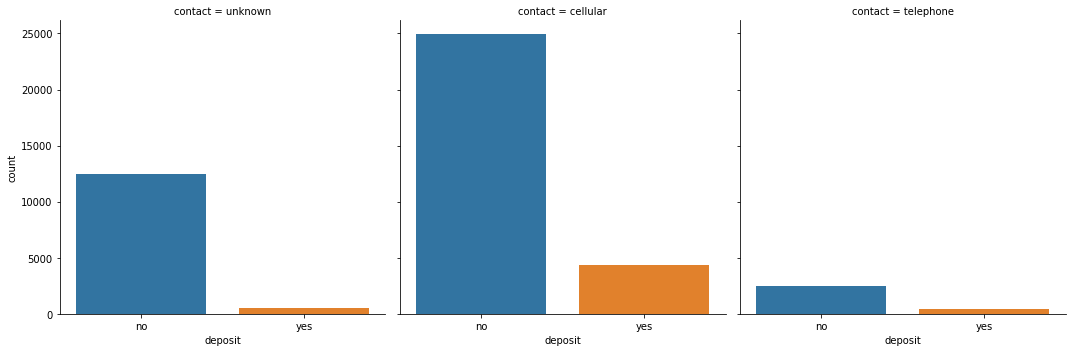

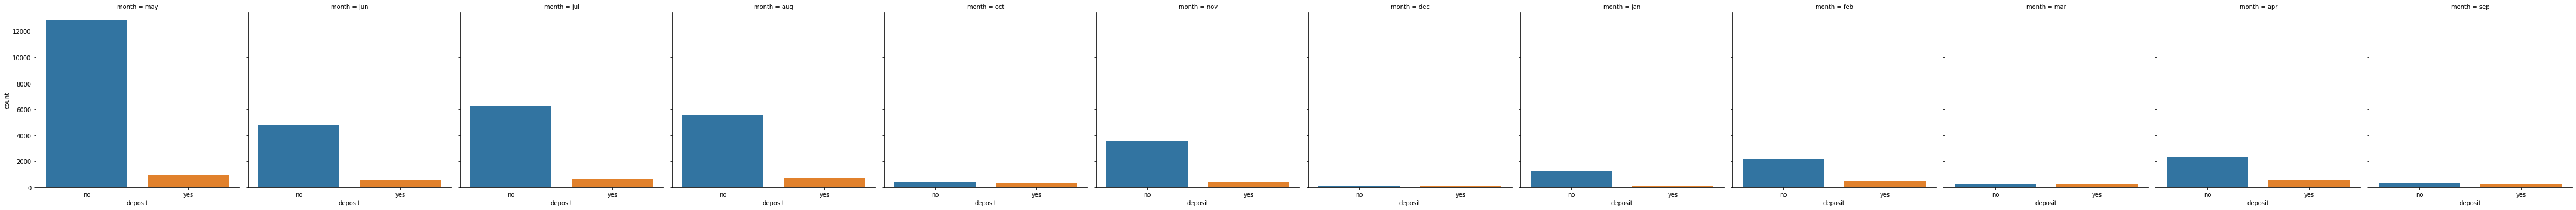

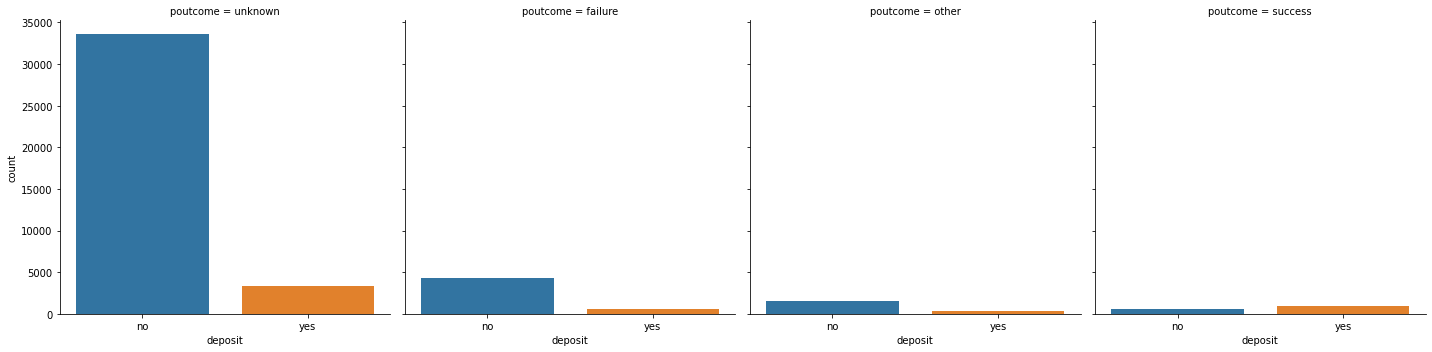

In [42]:
#Find out the relationship between categorical variable and dependent variable 
for categorical_feature in categorical_features:
  sns.catplot(x='deposit', col=categorical_feature, kind = 'count', data = data)
plt.show()

In [43]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
  print(data.groupby(['deposit', categorical_feature]).size())

deposit  job          
no       admin.           4540
         blue-collar      9024
         entrepreneur     1364
         housemaid        1131
         management       8157
         retired          1748
         self-employed    1392
         services         3785
         student           669
         technician       6757
         unemployed       1101
         unknown           254
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     4585
         married     24459
         single      10878
yes      divorced      622
         married      2755
         single       1912
dtype: int64
deposit  education
no      

**Take away**

*   Students have more interest in the deposit as compared to blue collar that has the least interest
*   Clients who has housing loan seem not to be interested in the deposit
*   14% of clients who has no personal loan said Yes to the deposit while about 7% of clients who has personal loan said Yes  
*   In month of March, September October and December client show high interest to deposit
*   In the month of may,records are high but clients interest ratio is very less



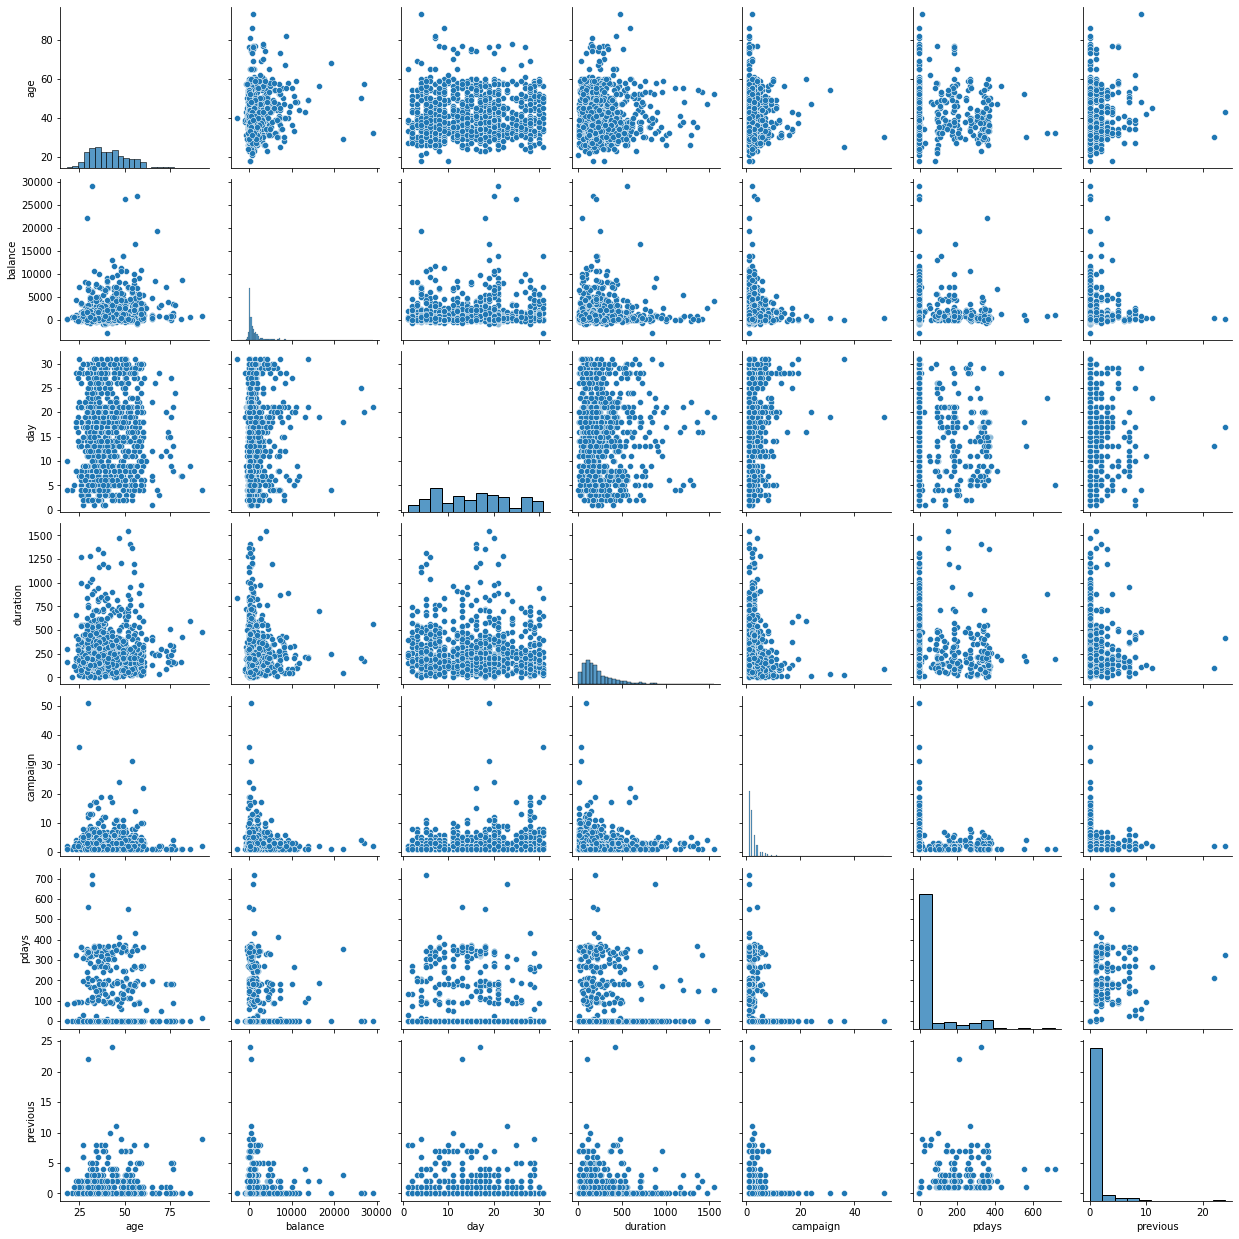

In [12]:
sns.pairplot(data.sample(1000))
plt.show()

<AxesSubplot:>

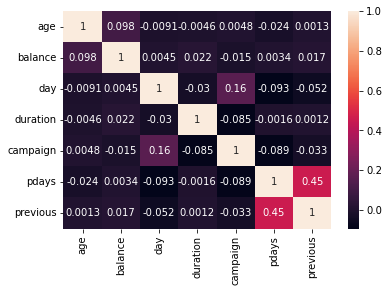

In [18]:
sns.heatmap(data.corr(),annot=True)